## Exploratory Data Analysis

References
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

### With original data

In [8]:
import kagglehub

path = kagglehub.dataset_download("rmisra/imdb-spoiler-dataset")
# print("Path to dataset files:", path)

/home/ayush/anaconda3/envs/pp/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import pandas as pd

movie_details = pd.read_json(path + "/IMDB_movie_details.json", lines=True)
reviews = pd.read_json(path + "/IMDB_reviews.json", lines=True)

In [3]:
print(reviews.info())
print(movie_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   r

In [4]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [5]:
len(reviews)

573913

In [6]:
movie_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [7]:
# number of unique movies in the dataset
num_unique_movies = movie_details['movie_id'].nunique()
print(f"Number of unique movies in the dataset: {num_unique_movies}")

Number of unique movies in the dataset: 1572


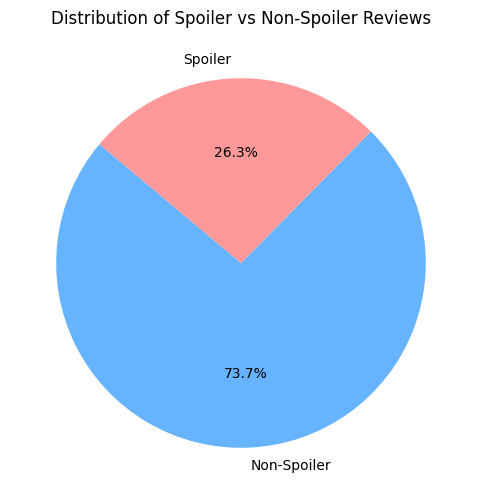

In [8]:
# spoiler distribution as pie chart
import matplotlib.pyplot as plt
spoiler_counts = reviews['is_spoiler'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(spoiler_counts, labels=['Non-Spoiler', 'Spoiler'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Spoiler vs Non-Spoiler Reviews')
plt.show()

### With preprocessed data 
(processed in 02_preprocessing.ipynb)

In [1]:
import pandas as pd

movie_details_pp = pd.read_feather("../data/preprocessed_movie_details.feather")
reviews_pp = pd.read_feather("../data/preprocessed_reviews.feather")

In [2]:
movie_details_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_id                1572 non-null   object 
 1   plot_summary            1572 non-null   object 
 2   duration                1572 non-null   object 
 3   genre                   1572 non-null   object 
 4   rating                  1572 non-null   float64
 5   release_date            1572 non-null   object 
 6   plot_synopsis           1572 non-null   object 
 7   original_plot_summary   1572 non-null   object 
 8   original_plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(8)
memory usage: 110.7+ KB


In [3]:
reviews_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_date              573913 non-null  object
 1   movie_id                 573913 non-null  object
 2   user_id                  573913 non-null  object
 3   is_spoiler               573913 non-null  bool  
 4   review_text              573913 non-null  object
 5   rating                   573913 non-null  int64 
 6   review_summary           573913 non-null  object
 7   original_review_text     573913 non-null  object
 8   original_review_summary  573913 non-null  object
 9   review_text_ner          573913 non-null  object
 10  review_summary_ner       573913 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 44.3+ MB


In [4]:
movie_details_pp.sample(10, random_state=234)

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,original_plot_summary,original_plot_synopsis
27,tt0108399,"[detroit, clarence, worley, go, movie, theater...",2h,"[Crime, Drama, Romance]",7.9,1993-09-10,"[comic, book, store, clerk, film, buff, claren...","In Detroit, Clarence Worley goes to the movie ...",Comic book store clerk and film buff Clarence ...
227,tt0482606,"[return, wed, reception, couple, stay, isolate...",1h 26min,"[Horror, Mystery, Thriller]",6.2,2008-05-30,"[kristen, mckay, liv, tyler, james, hoyt, scot...","After returning from a wedding reception, a co...",Kristen McKay (Liv Tyler) and James Hoyt (Scot...
343,tt0186151,"[rare, atmospheric, phenomenon, allow, new, yo...",1h 58min,"[Crime, Drama, Mystery]",7.4,2000-04-28,"[october, frank, sullivan, new, york, city, fi...",A rare atmospheric phenomenon allows a New Yor...,It is October 1969. Frank Sullivan is a New Yo...
981,tt2293640,"[ever, since, dawn, time, minion, live, serve,...",1h 31min,"[Animation, Action, Adventure]",6.4,2015-07-10,"[movie, start, narration, minion, exist, since...","Ever since the dawn of time, the Minions have ...",The movie starts with a narration about the mi...
505,tt1078940,"[dave, ronnie, jason, cynthia, joey, lucy, clo...",1h 53min,[Comedy],5.5,2009-10-09,"[movie, focus, couple, marry, two, young, kid,...","Dave and Ronnie, Jason and Cynthia, and Joey a...",This movie focuses on 4 couples: * The married...
326,tt5715874,"[untimely, death, year, old, martin, father, o...",2h 1min,"[Drama, Horror, Mystery]",7.3,2017-11-03,[],After the untimely death of 16-year-old Martin...,
1280,tt0468569,"[set, within, year, event, batman, begin, batm...",2h 32min,"[Action, Crime, Drama]",9.0,2008-07-18,"[movie, begin, gang, men, clown, mask, break, ...",Set within a year after the events of Batman B...,The movie begins with a gang of men with clown...
502,tt0151738,"[chicago, sun, time, copy, editor, josie, gell...",1h 47min,"[Comedy, Drama, Romance]",6.0,1999-04-09,"[josie, geller, draw, barrymore, highly, intel...",Chicago Sun Times copy editor Josie Gellar (25...,Josie Geller (Drew Barrymore) is a highly inte...
1166,tt0101587,"[mitch, middle, age, big, city, radio, ad, sal...",1h 53min,[Comedy],6.7,1991-06-07,"[mitch, robbins, billy, crystal, best, friend,...",Mitch is a middle aged big-city radio ads sale...,Mitch Robbins (Billy Crystal) and his best fri...
585,tt0455944,"[equalizer, denzel, washington, play, mccall, ...",2h 12min,"[Action, Crime, Thriller]",7.2,2014-09-26,"[robert, mccall, denzel, washington, get, earl...","In The Equalizer, Denzel Washington plays McCa...",Robert McCall (Denzel Washington) gets up earl...


In [5]:
reviews_pp["review_text"].sample(10, random_state=134).tolist()

[array(['doubt', 'big', 'budget', 'box', 'office', 'hit', 'hype',
        'surround', 'movie', 'feel', 'score', 'base', 'rather', 'quality',
        'film', 'make', 'script', 'act', 'let', 'explain', 'christian',
        'bale', 'delivers', 'solid', 'batman', 'performance', 'raspy',
        'batman', 'voice', 'get', 'laughable', 'time', 'one', 'cant',
        'help', 'think', 'may', 'blow', 'ring', 'try', 'add', 'nut',
        'voice', 'support', 'cast', 'freeman', 'etc', 'around', 'decent',
        'definitely', 'lose', 'point', 'book', 'drop', 'lead', 'actress',
        'first', 'film', 'perhaps', 'kate', 'holmes', 'go', 'scientology',
        'boot', 'camp', 'gary', 'oldman', 'real', 'treat', 'watch', 'act',
        'always', 'pleasure', 'excite', 'landed', 'role', 'gordon', 'keep',
        'definitely', 'one', 'best', 'actor', 'time', 'finally', 'joker',
        'get', 'wrong', 'mr', 'ledger', 'fair', 'job', 'play', 'joker',
        'performance', 'seem', 'base', 'nicholson', 'joke

#### Character/word Length Distribution of Reviews

<Axes: >

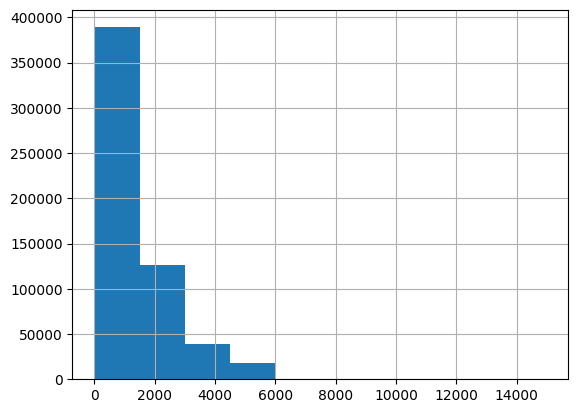

In [14]:
# review text char length distribution
reviews["review_text"].str.len().hist()

<Axes: >

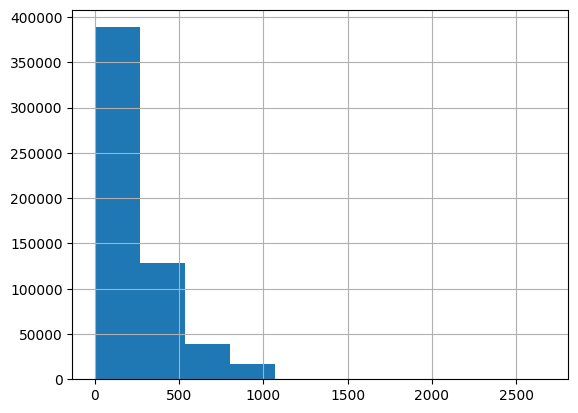

In [15]:
# review text word count distribution
reviews["review_text"].str.split().apply(len).hist()

<Axes: >

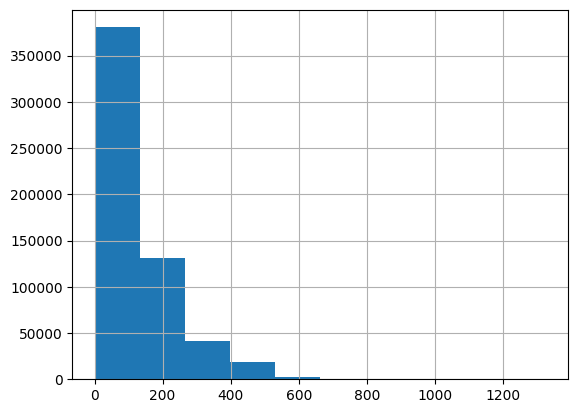

In [16]:
reviews_pp["review_text"].str.len().hist() 

#### Word Cloud of Most Common Words in Reviews (grouped by spoiler/non-spoiler)

Total length of all reviews text: 503601764 characters


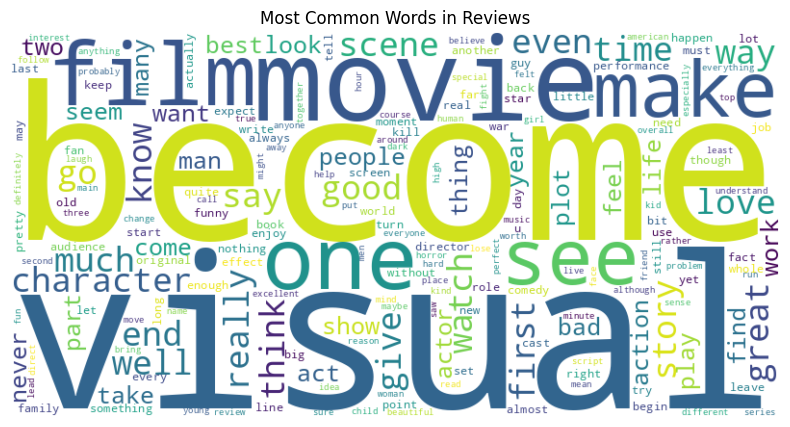

In [4]:
# wordcloud of most common words in reviews
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

all_reviews_text = reviews_pp["review_text"].explode().str.cat(sep=' ')
print(f"Total length of all reviews text: {len(all_reviews_text)} characters")

# keep only top 1000 words for wordcloud

word_freq = Counter(all_reviews_text.split())
top_words = dict(word_freq.most_common(1000))
all_reviews_text = ' '.join(top_words.keys())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


Total length of spoiler reviews text: 170697258 characters


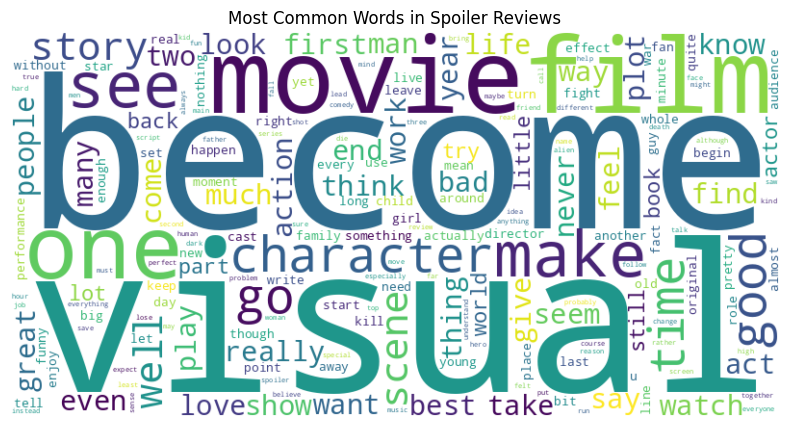

In [5]:
# most common words in spoiler reviews
spoiler_reviews_text = reviews_pp[reviews_pp["is_spoiler"] == 1]["review_text"].explode().str.cat(sep=' ')
print(f"Total length of spoiler reviews text: {len(spoiler_reviews_text)} characters")

# keep only top 1000 words for wordcloud

word_freq = Counter(spoiler_reviews_text.split())
top_words = dict(word_freq.most_common(1000))
spoiler_reviews_text = ' '.join(top_words.keys())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spoiler_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spoiler Reviews')
plt.show()


Total length of non-spoiler reviews text: 332904505 characters


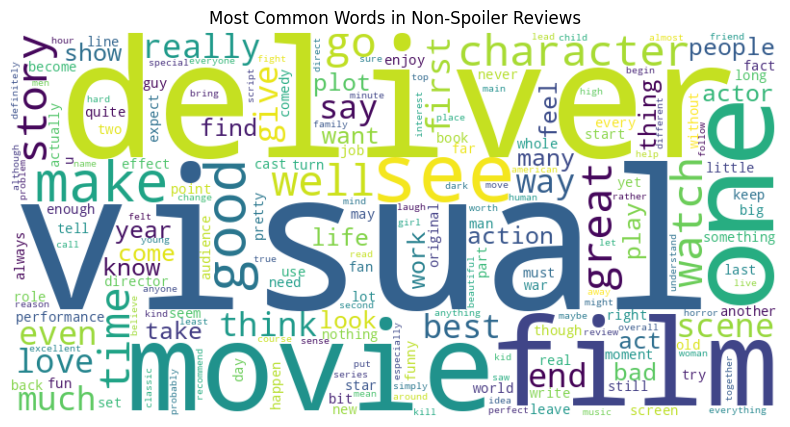

In [6]:
# most common words in non-spoiler reviews
non_spoiler_reviews_text = reviews_pp[reviews_pp["is_spoiler"] == 0]["review_text"].explode().str.cat(sep=' ')
print(f"Total length of non-spoiler reviews text: {len(non_spoiler_reviews_text)} characters")  

# keep only top 1000 words for wordcloud

word_freq = Counter(non_spoiler_reviews_text.split())
top_words = dict(word_freq.most_common(1000))
non_spoiler_reviews_text = ' '.join(top_words.keys())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spoiler_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Non-Spoiler Reviews')
plt.show()


#### How often do reviewers mention "spoiler" in non-spoiler reviews vs spoiler reviews?

Could be improved by looking for variations like "If you haven't seen the movie, don't read this review" etc.

In [16]:
# number of times "spoiler" appears in spoiler vs non-spoiler reviews

# review_text in reviews_pp may be lists (tokenized) or other non-string types.
# Convert each review to a plain string first, then use .str accessor.
from pandas.api.types import is_list_like

def _to_text(x):
	# treat list-like objects (including numpy arrays, pandas Series) but not strings
	if is_list_like(x) and not isinstance(x, (str, bytes)):
		return ' '.join(map(str, x))
	if pd.isna(x):
		return ''
	return str(x)

spoiler_texts = reviews_pp["review_text"].apply(_to_text).str.lower()
spoiler_count_spoiler_reviews = spoiler_texts[reviews_pp["is_spoiler"] == 1].str.count("spoiler").sum()
spoiler_count_non_spoiler_reviews = spoiler_texts[reviews_pp["is_spoiler"] == 0].str.count("spoiler").sum()
print(f'The word "spoiler" appears {spoiler_count_spoiler_reviews} out of {len(reviews_pp[reviews_pp["is_spoiler"] == 1])} ({spoiler_count_spoiler_reviews / len(reviews_pp[reviews_pp["is_spoiler"] == 1]) * 100:.2f}%) spoiler reviews.')
print(f'The word "spoiler" appears {spoiler_count_non_spoiler_reviews} out of {len(reviews_pp[reviews_pp["is_spoiler"] == 0])} ({spoiler_count_non_spoiler_reviews / len(reviews_pp[reviews_pp["is_spoiler"] == 0]) * 100:.2f}%) non-spoiler reviews.')

The word "spoiler" appears 23319 out of 150924 (15.45%) spoiler reviews.
The word "spoiler" appears 8346 out of 422989 (1.97%) non-spoiler reviews.


In [33]:
# sample reviews containing the word "spoiler"
reviews_with_spoiler = reviews_pp[spoiler_texts.str.contains("spoiler") & (reviews_pp["is_spoiler"] == 1)]
reviews_with_spoiler.sample(10, random_state=345)["original_review_text"].map(_to_text).tolist()

['***MILD SPOILER*** I had the chance to see the norwegian version of Insomnia a few years ago and I can\'t say I was impressed.  Being an insomniac myself I was intrigued to watch this film too especially when I found out that two of my favorite actors were in it (always cool Martin Donovan and Al the man Pacino).I never really understood what all the fuzz about Christopher Nolan is all about.  Following was clever but nothing to write home about and while the trick he used in Memento made the film really popular I thought the film was inferior to Gaspar Noe\'s "Irreversible".  What I think Christopher Nolan\'s films lack is a heart and a meaning and unfortunately Insomnia isn\'t an exception.The film has a lot of great actors, Pacino is good as usual and both Robin Williams and Hilary Swank play their parts well, but there\'s still something lacking. Martin Donovan died too soon (sorry for the spoiler) and I think Nolan focused too much on Pacino\'s guilts for what happened than on h

In [32]:
reviews_with_spoiler = reviews_pp[spoiler_texts.str.contains("spoiler") & (reviews_pp["is_spoiler"] == 0)]
reviews_with_spoiler.sample(10, random_state=345)["original_review_text"].map(_to_text).tolist()

["Rain splattering down all over, and blood giving it a close competition..... 10 ppl stuck in a dingy motel,one severely injured, one cop ,one convict and several shady characters included... and as expected suddenly a competition begins of who can get killed before whom and the countdown begins to give the gold medal to the struggling survivor....... But all of a sudden enters a mental patient,hence changing the entire ball game..... none the less, it's very entertaining.... and the twist in the tail,, really twists it painfully hard,, overall, nice thriller film...It did have it's funny moments though-- how can u kill someone by an overspeeding car when ur speedometer reads zero? How can a broken lock hold a door when 2 ppl were trying to choke-slam it, undertaker style?? there r many more, but i don't wanna give the spoilers here..So it's recommended to all those who liked films like-- shutter island, stay, Mulholland drive etc...",
 "This was a movie that had an intriguing story, 

#### count of Named Entities in spoiler vs non-spoiler reviews

- Not much difference seen here. It's only slightly higher in spoiler reviews. (Expected spoiler reviews to have significantly higher named entity counts but no)

In [ ]:
# calculate total number of named entities per review

def get_total_named_entities(ner_dict):
    return sum(count for count in ner_dict.values() if count is not None)

reviews_pp["num_named_entities"] = reviews_pp["review_text_ner"].apply(get_total_named_entities)
reviews_pp.sample(5, random_state=234)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,original_review_text,original_review_summary,review_text_ner,review_summary_ner,count_named_entities,num_named_entities
244476,8 August 2016,tt1386697,ur68277297,False,"[know, wrong, critic, nowadays, jumpy, marvel,...",9,"[movie, amazing]",I don't know what's wrong with the critics now...,This movie is amazing.,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,12.0
569344,30 June 2000,tt0120655,ur0781795,False,"[funny, movie, see, long, time, kevin, smith, ...",8,"[hilarious, movie, great, cast, great, plot]",This was the funniest movie I had seen in a lo...,A hilarious movie with a great cast and a grea...,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,10.0
194640,28 September 2013,tt0816711,ur46940562,False,"[caught, dvd, zombie, run, like, gazelle, even...",9,"[new, breed, zombie]",I just caught this on DVD. Having the zombies ...,New Breed of Zombies,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,2.0
393096,25 November 2005,tt0294870,ur2817149,True,"[far, movie, go, would, put, classification, b...",10,"[love, broadway, show, loved, movie, even]","As far as this movie goes, I would put it in t...",I loved the Broadway show... but I loved the m...,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,9.0
365388,18 June 2005,tt0369339,ur5492998,True,"[tom, cruise, play, hit, man, name, vincent, d...",8,"[good, movie]",tom cruise plays a hit-man named Vincent who d...,a very good movie,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,11.0


In [21]:
# Named entity count to token count ratio
reviews_pp["ner_to_token_count_ratio"] = reviews_pp["num_named_entities"] / reviews_pp["review_text"].apply(len)
reviews_pp.sample(5, random_state=234)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,original_review_text,original_review_summary,review_text_ner,review_summary_ner,count_named_entities,num_named_entities,ner_to_token_count_ratio
244476,8 August 2016,tt1386697,ur68277297,False,"[know, wrong, critic, nowadays, jumpy, marvel,...",9,"[movie, amazing]",I don't know what's wrong with the critics now...,This movie is amazing.,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,12.0,0.102564
569344,30 June 2000,tt0120655,ur0781795,False,"[funny, movie, see, long, time, kevin, smith, ...",8,"[hilarious, movie, great, cast, great, plot]",This was the funniest movie I had seen in a lo...,A hilarious movie with a great cast and a grea...,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,10.0,0.196078
194640,28 September 2013,tt0816711,ur46940562,False,"[caught, dvd, zombie, run, like, gazelle, even...",9,"[new, breed, zombie]",I just caught this on DVD. Having the zombies ...,New Breed of Zombies,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,2.0,0.039216
393096,25 November 2005,tt0294870,ur2817149,True,"[far, movie, go, would, put, classification, b...",10,"[love, broadway, show, loved, movie, even]","As far as this movie goes, I would put it in t...",I loved the Broadway show... but I loved the m...,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,9.0,0.051136
365388,18 June 2005,tt0369339,ur5492998,True,"[tom, cruise, play, hit, man, name, vincent, d...",8,"[good, movie]",tom cruise plays a hit-man named Vincent who d...,a very good movie,"{'CARDINAL': None, 'DATE': None, 'EVENT': None...","{'CARDINAL': None, 'DATE': None, 'EVENT': None...",18,11.0,0.142857


In [16]:
# average number of named entities in spoiler vs non-spoiler reviews
avg_named_entities_spoiler = reviews_pp[reviews_pp["is_spoiler"] == 1]["num_named_entities"].mean()
avg_named_entities_non_spoiler = reviews_pp[reviews_pp["is_spoiler"] == 0]["num_named_entities"].mean()
print(f"Average number of named entities in spoiler reviews: {avg_named_entities_spoiler:.2f}")
print(f"Average number of named entities in non-spoiler reviews: {avg_named_entities_non_spoiler:.2f}")

Average number of named entities in spoiler reviews: 18.12
Average number of named entities in non-spoiler reviews: 12.09


In [22]:
# average named entity to token count ratio in spoiler vs non-spoiler reviews
avg_ner_to_token_ratio_spoiler = reviews_pp[reviews_pp["is_spoiler"] == 1]["ner_to_token_count_ratio"].mean()
avg_ner_to_token_ratio_non_spoiler = reviews_pp[reviews_pp["is_spoiler"] == 0]["ner_to_token_count_ratio"].mean()
print(f"Average named entity to token count ratio in spoiler reviews: {avg_ner_to_token_ratio_spoiler:.4f}")
print(f"Average named entity to token count ratio in non-spoiler reviews: {avg_ner_to_token_ratio_non_spoiler:.4f}")

Average named entity to token count ratio in spoiler reviews: 0.1003
Average named entity to token count ratio in non-spoiler reviews: 0.0957


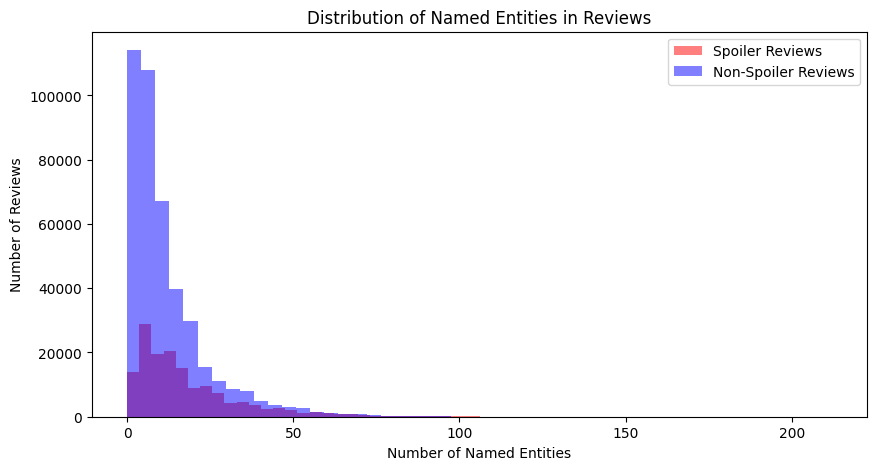

In [24]:
# histogram of number of named entities in spoiler vs non-spoiler reviews
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(reviews_pp[reviews_pp["is_spoiler"] == 1]["num_named_entities"], bins=50, alpha=0.5, label='Spoiler Reviews', color='red')
plt.hist(reviews_pp[reviews_pp["is_spoiler"] == 0]["num_named_entities"], bins=50, alpha=0.5, label='Non-Spoiler Reviews', color='blue')
plt.xlabel('Number of Named Entities')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Named Entities in Reviews')
plt.legend()